In [1]:
import numpy as np

from py.simulation import *
from py.estimation import *
from py.features import *
from py.utils import *

from importlib import reload
from scipy.optimize import root


from matplotlib import pyplot as plt

In [49]:
n = 50

n_rounds = 1000
lam = .99
beta = np.array([1, 0])

m_updates = 100

p = .5

def feature_(A, p = 1):
    n = A.shape[1]
    S = np.zeros((2,n,n))
    S[0] = A.sum(axis = 0)**p
    S[1] = 0
    return(S)

feature = time_series_vectorizer(feature_)

In [ ]:
def order(beta):
    A0 = 1 / m_updates * np.ones((n,n)) + .001*np.random.randint(2, size = (n,n))

    T = simulate(A0, 
                 n_rounds = n_rounds, 
                 lam = lam, 
                 feature = lambda A: feature(A, p = p), 
                 beta = np.array([beta,0]), 
                 m_updates = m_updates, 
                 method = 'deterministic')

    A = state_matrix(T, A0 = A0, lam = lam)
    
    return(np.var(A[-1].sum(axis = 0)))

BETAS = np.linspace(0,10,101)
V = np.array([order(beta) for beta in BETAS])

In [43]:
# estimation of the phase transition

def f(beta, d, p, n):
    I = np.eye(n,n)
    E = np.ones((n,n))
    
    M = I - (beta*p*(d**(p-1)))*(I - 1/n*E)
    
    eig = np.linalg.eigh(M)[0]
    return(eig.min())

d = m_updates / n

beta = root(lambda beta: f(beta, d = .5*d, p = p, n = n), 
     x0 = 2)['x']

(0, 1)

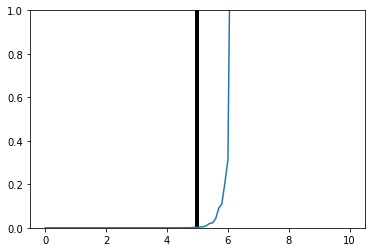

In [48]:
plt.plot(BETAS, V)
plt.vlines([beta], ymin = 0, ymax = 3, color = 'black', linewidth = 4)
plt.ylim(0,1)